In [38]:
import seaborn as sns
import json
import numpy as np

from bounds.bound_utils import Error
from expe_lib import unpickle_bound, PROBLEMS

NB_POINTS = 1000

try:
    snakemake.input
except:
    snakemake = type('', (), {})()
    snakemake.input = [
        "output/bounds/bound_lagrangian_flat/toy_2/10_primal.json",
        "output/bounds/truth/toy_2/100.npz"
    ]
    snakemake.wildcards = {}
    snakemake.wildcards["bound"] = "bound_lagrangian_flat"
    snakemake.wildcards["problem"] = "toy_2"
    snakemake.output = "output/bounds/bound_lagrangian_flat/toy_2/10_primal.png"

In [39]:
problem = PROBLEMS[snakemake.wildcards["problem"]]()
space = np.linspace(*problem.range, NB_POINTS)
bounds_obj = [unpickle_bound(x["bound"]) for x in json.load(open(snakemake.input[0]))["bounds"]]
print(bounds_obj)
bounds = [x(space) if x is not None else Error()(space) for x in bounds_obj]

[Constant(value=array([-0.70212766]), limits=(-4.0, -3.111111111111111)), Constant(value=array([-1.06451613]), limits=(-3.111111111111111, -2.2222222222222223)), Constant(value=array([-2.2]), limits=(-2.2222222222222223, -1.3333333333333335)), Constant(value=array([-0.86407767]), limits=(-1.3333333333333335, -0.44444444444444464)), Constant(value=array([-0.76842105]), limits=(-0.44444444444444464, 0.44444444444444464)), Constant(value=array([-0.85822021]), limits=(0.44444444444444464, 1.333333333333333)), Constant(value=array([-1.09590346]), limits=(1.333333333333333, 2.2222222222222214)), Error(), Constant(value=array([-0.76035049]), limits=(3.1111111111111107, 4.0))]


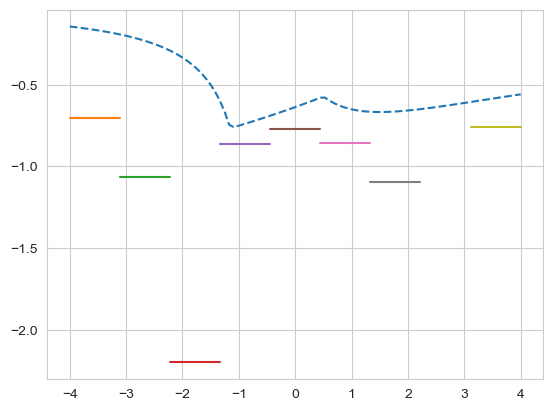

In [42]:
fig = sns.lineplot(x=np.linspace(*problem.range, 100), y=np.load(snakemake.input[1])["arr_0"], linestyle="--")
for b in bounds: 
    if np.isnan(b).sum() != len(b):
        sns.lineplot(x=space, y=b)
fig.get_figure().savefig(str(snakemake.output))